# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries
import sys
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# load messages dataset
messages = pd.read_csv('messages.csv')
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [3]:
messages.shape

(26248, 4)

In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [22]:
pd.options.display.max_colwidth = 4000

In [23]:
# load categories dataset
categories = pd.read_csv('categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-0;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;earthquake-0;cold-0;other_weather-0;direct_report-0
1,7,related-1;request-0;offer-0;aid_related-1;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-1;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-1;floods-0;storm-1;fire-0;earthquake-0;cold-0;other_weather-0;direct_report-0
2,8,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-0;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;earthquake-0;cold-0;other_weather-0;direct_report-0
3,9,related-1;request-1;offer-0;aid_related-1;medical_help-0;medical_products-1;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-1;infrastructure_related-1;transport-0;buildings-1;electricity-0;tools-0;hospitals-1;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;earthquake-0;cold-0;other_weather-0;direct_report-0
4,12,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-0;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;earthquake-0;cold-0;other_weather-0;direct_report-0


In [5]:
categories.shape

(26248, 2)

### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [6]:
# merge datasets
df = messages.merge(categories, how='inner', on='id')
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [7]:
# create a dataframe of the 36 individual category columns
categories = df['categories'].str.split(';', expand = True) # by setting 'expand=True' the code outputs a df instead of a nested list 
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [8]:
# select the first row of the categories dataframe
row = categories.iloc[0,:]
# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = row.transform(lambda x: x[:-2]).tolist()
print(category_colnames)

['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [9]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.as.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [10]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].transform(lambda x: x[-1:])
    
    # convert column from string to numeric
    categories[column] = categories[column].astype(int)
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [11]:
# drop the original categories column from `df`
df.drop('categories',axis=1, inplace=True)
df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [12]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df, categories], axis = 1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


-----genre------
news      0.500845
direct    0.408560
social    0.090595
Name: genre, dtype: float64


<AxesSubplot:>

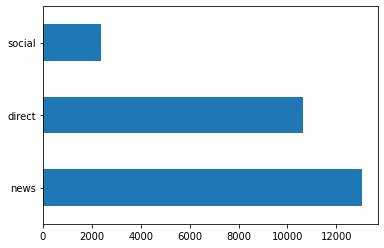

-----related------
1    0.764792
0    0.235208
Name: related, dtype: float64


<AxesSubplot:>

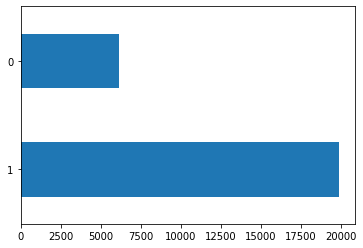

-----request------
0    0.828108
1    0.171892
Name: request, dtype: float64


<AxesSubplot:>

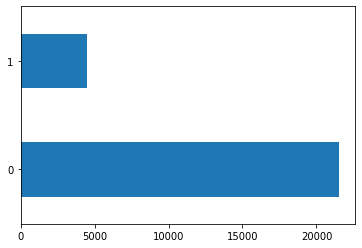

-----offer------
0    0.995466
1    0.004534
Name: offer, dtype: float64


<AxesSubplot:>

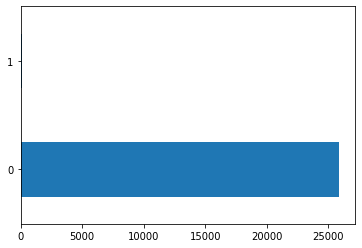

-----aid_related------
0    0.582757
1    0.417243
Name: aid_related, dtype: float64


<AxesSubplot:>

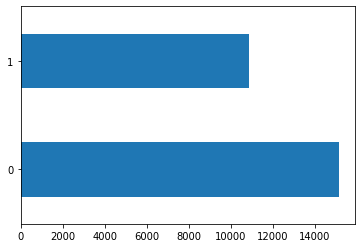

-----medical_help------
0    0.919932
1    0.080068
Name: medical_help, dtype: float64


<AxesSubplot:>

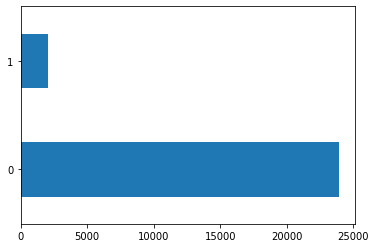

-----medical_products------
0    0.949554
1    0.050446
Name: medical_products, dtype: float64


<AxesSubplot:>

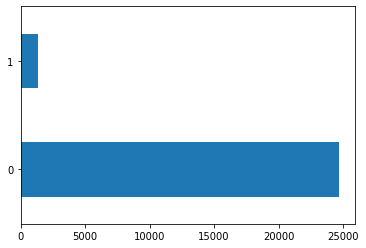

-----search_and_rescue------
0    0.972184
1    0.027816
Name: search_and_rescue, dtype: float64


<AxesSubplot:>

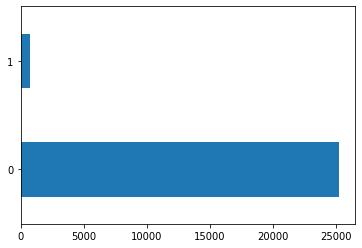

-----security------
0    0.981904
1    0.018096
Name: security, dtype: float64


<AxesSubplot:>

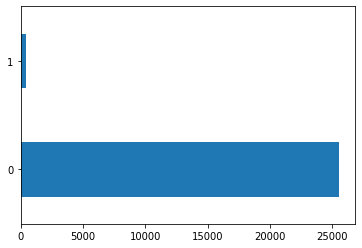

-----military------
0    0.966959
1    0.033041
Name: military, dtype: float64


<AxesSubplot:>

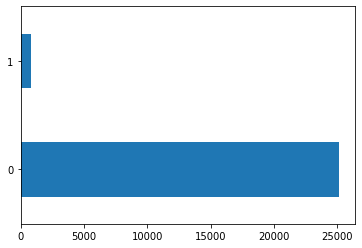

-----water------
0    0.935761
1    0.064239
Name: water, dtype: float64


<AxesSubplot:>

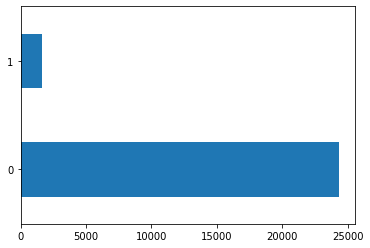

-----food------
0    0.887698
1    0.112302
Name: food, dtype: float64


<AxesSubplot:>

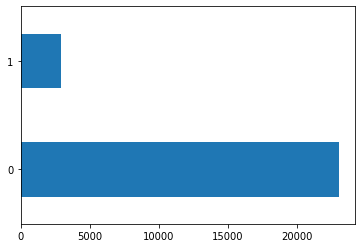

-----shelter------
0    0.911096
1    0.088904
Name: shelter, dtype: float64


<AxesSubplot:>

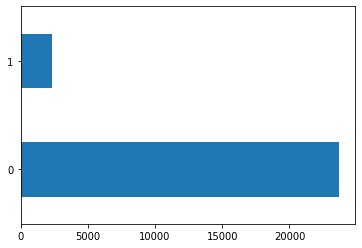

-----clothing------
0    0.98444
1    0.01556
Name: clothing, dtype: float64


<AxesSubplot:>

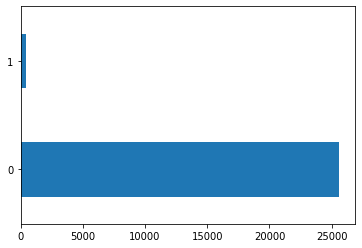

-----money------
0    0.976794
1    0.023206
Name: money, dtype: float64


<AxesSubplot:>

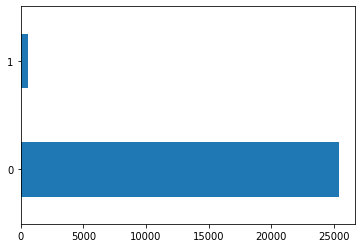

-----missing_people------
0    0.988551
1    0.011449
Name: missing_people, dtype: float64


<AxesSubplot:>

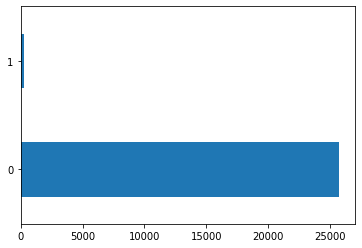

-----refugees------
0    0.966382
1    0.033618
Name: refugees, dtype: float64


<AxesSubplot:>

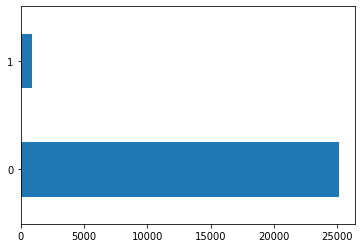

-----death------
0    0.954126
1    0.045874
Name: death, dtype: float64


<AxesSubplot:>

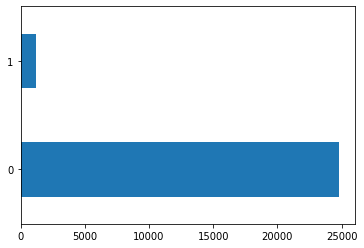

-----other_aid------
0    0.867604
1    0.132396
Name: other_aid, dtype: float64


<AxesSubplot:>

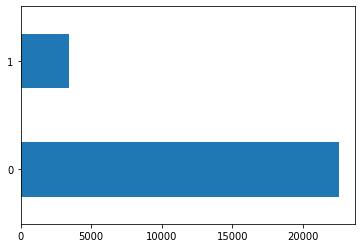

-----infrastructure_related------
0    0.934494
1    0.065506
Name: infrastructure_related, dtype: float64


<AxesSubplot:>

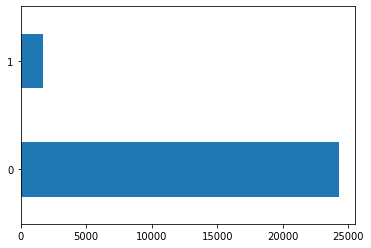

-----transport------
0    0.953857
1    0.046143
Name: transport, dtype: float64


<AxesSubplot:>

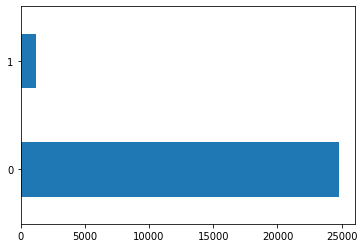

-----buildings------
0    0.948786
1    0.051214
Name: buildings, dtype: float64


<AxesSubplot:>

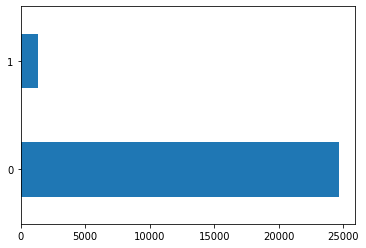

-----electricity------
0    0.97956
1    0.02044
Name: electricity, dtype: float64


<AxesSubplot:>

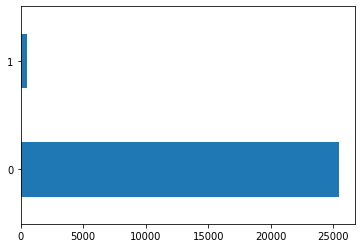

-----tools------
0    0.993891
1    0.006109
Name: tools, dtype: float64


<AxesSubplot:>

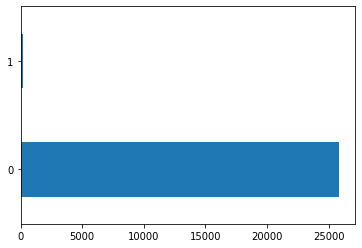

-----hospitals------
0    0.989127
1    0.010873
Name: hospitals, dtype: float64


<AxesSubplot:>

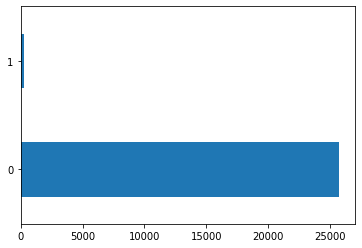

-----shops------
0    0.99539
1    0.00461
Name: shops, dtype: float64


<AxesSubplot:>

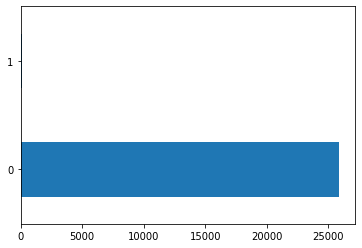

-----aid_centers------
0    0.988128
1    0.011872
Name: aid_centers, dtype: float64


<AxesSubplot:>

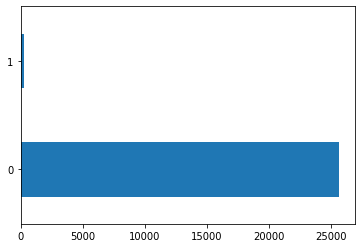

-----other_infrastructure------
0    0.955778
1    0.044222
Name: other_infrastructure, dtype: float64


<AxesSubplot:>

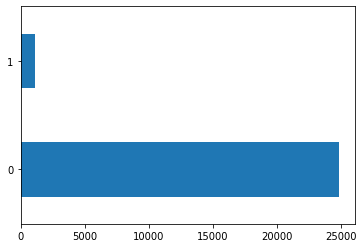

-----weather_related------
0    0.719648
1    0.280352
Name: weather_related, dtype: float64


<AxesSubplot:>

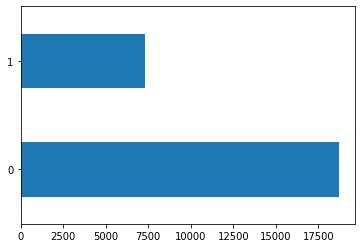

-----floods------
0    0.917205
1    0.082795
Name: floods, dtype: float64


<AxesSubplot:>

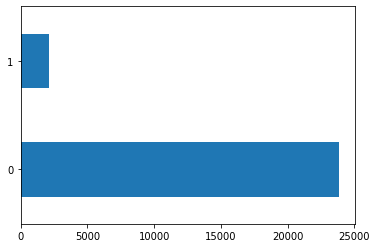

-----storm------
0    0.90614
1    0.09386
Name: storm, dtype: float64


<AxesSubplot:>

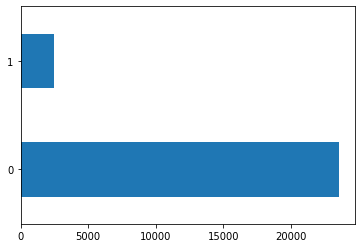

-----fire------
0    0.989166
1    0.010834
Name: fire, dtype: float64


<AxesSubplot:>

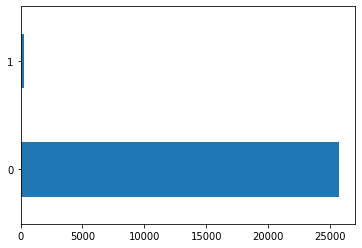

-----earthquake------
0    0.905679
1    0.094321
Name: earthquake, dtype: float64


<AxesSubplot:>

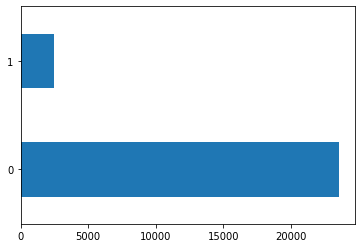

-----cold------
0    0.979637
1    0.020363
Name: cold, dtype: float64


<AxesSubplot:>

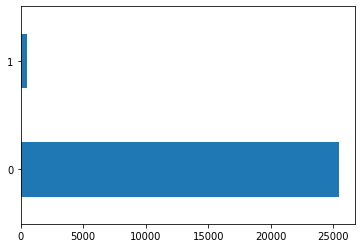

-----other_weather------
0    0.947134
1    0.052866
Name: other_weather, dtype: float64


<AxesSubplot:>

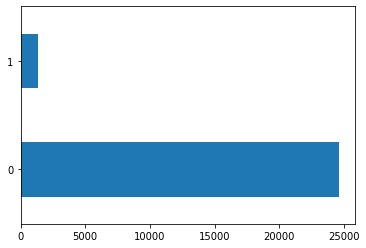

-----direct_report------
0    0.805018
1    0.194982
Name: direct_report, dtype: float64


<AxesSubplot:>

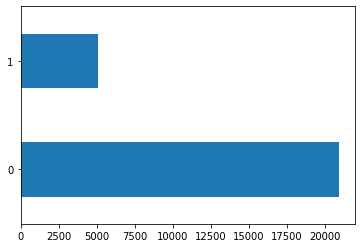

In [24]:
import matplotlib.pyplot as plt

for col in df.columns[3:,]:
    print("-----%s------"%col)
    print(df[col].value_counts(sort=True, normalize=True))
    df[col].value_counts().plot(kind='barh')
    plt.show();

#### Observations:
* Several features are `HIGHLY imbalanced`, there are a few recipes to cure this, such as: **Under from majority class and Over Samplings from minority class, etc.** However, due to time constraints, I will skip this.

* `related=2` will be dropped because it represents a minority of the feature 

* It seems like there is only one class for `child_alone`, so this column is meaningless and thus can be dropped

* It's sort of mundane to scroll through all of the value counts line by line, so let's loop through relevant columns

In [14]:
df.drop('child_alone',axis=1, inplace = True)
df = df[df['related'] != 2]

for col in df.columns:
    unique_entries = len(df[col].unique())
    if unique_entries != 2:
        print(col, unique_entries)

id 25993
message 25990
original 9508
genre 3


### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

export PROMPT="🎩Mista1~ %# ";clear;

In [15]:
# check number of duplicates
print(df.duplicated().sum())

# drop duplicates
df = df.drop_duplicates()

# check number of duplicates
print(df.duplicated().sum())

154
0


### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [19]:
engine = create_engine('sqlite:///processed_data.db')
df.to_sql('df', engine, index=False)

26028

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.